In [4]:
import random
import warnings

import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
import sys
import os

python_dir = os.path.abspath('..')
sys.path.append(python_dir)

In [9]:
import bootcamp_2021_01

In [10]:
from pilotis_io.directory_structure import dataset_raw_dir_path
from pilotis_io.local import LocalPandasApi
from pilotis_io.local.local_io_api import LocalIoApi

from bootcamp_2021_01.domain.feature_engineering import feature_engineering
from bootcamp_2021_01.domain.modeling.model_optimization import tune_model
from bootcamp_2021_01.domain.persistence.use_cases.models_persistence import UseCasesModelPersistence

pd.set_option("display.max_columns", 100)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [30]:
WORK_DIR = '../../workdir'

MODEL_NAME = 'cat_boost'
USE_CASE_NAME = 'successful_startups'

# Load raw data for schema discovery

## Load data

In [12]:
io_api = LocalIoApi(WORK_DIR)
pandas_api = LocalPandasApi(io_api)

In [13]:
dataset_version = '2015-12'

invest_name = 'notpeter_investments'
invest_path = dataset_raw_dir_path(invest_name, dataset_version)

acq_name = 'notpeter_acquisitions'
acq_path = dataset_raw_dir_path(acq_name, dataset_version)

comp_name = 'notpeter_companies'
comp_path = dataset_raw_dir_path(comp_name, dataset_version)

In [14]:
dataset_version_bachelorarbeit_clean = '2013-12-cleaned'
orga_name = 'bachelorarbeit_organizations'
orga_path = dataset_raw_dir_path(orga_name, dataset_version_bachelorarbeit_clean)

orga_files = io_api.list_files_in_dir(orga_path)
organizations = pandas_api.load_pandas_dataset(orga_files)

In [15]:
vc_holy_grail_people_dataset_version = 'vc_holy_grail_cleaned'

vc_holy_grail_people_name = 'vc_holy_grail_people'
vc_holy_grail_people_path = dataset_raw_dir_path(vc_holy_grail_people_name, vc_holy_grail_people_dataset_version)

In [16]:
invest_files = io_api.list_files_in_dir(invest_path)
acq_files = io_api.list_files_in_dir(acq_path)
comp_files = io_api.list_files_in_dir(comp_path)
vc_holy_grail_people_files = io_api.list_files_in_dir(vc_holy_grail_people_path)

In [17]:
invest = pandas_api.load_pandas_dataset(invest_files, encoding='unicode_escape')
acq = pandas_api.load_pandas_dataset(acq_files, encoding='unicode_escape')
companies = pandas_api.load_pandas_dataset(comp_files, encoding='unicode_escape')
vc_holy_grail_people = pandas_api.load_pandas_dataset(vc_holy_grail_people_files)

/Users/victorlandeau/Library/Caches/pypoetry/virtualenvs/bootcamp-2021-01-JvUDATpG-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: DtypeWarning: Columns (17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  after removing the cwd from sys.path.


In [18]:
recent_invest = invest[invest.funded_at >= "2007-01-01"]

In [19]:
from datetime import date
from bootcamp_2021_01.domain.feature_engineering.target_definition import add_series_a_success_status

series_a_success_or_not_df = add_series_a_success_status(recent_invest, acq, companies, date(2015, 12, 3))

In [20]:
series_a_success_or_not_df.shape

(18865, 29)

In [21]:
series_a_success_or_not_df.head()

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,funded_at_as_date,series_a,has_new_funding_round,is_acquired,status,country_code,region,city,first_funding_at,homepage_url,successful_series_a
company_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
( caravelo (,/organization/caravelo,( caravelo (,Information Technology|Online Travel,ESP,56,Barcelona,Barcelona,/organization/fundacin-jos-manuel-entrecanales,FundaciÃ³n JosÃ© Manuel Entrecanales,ESP,29,Madrid,Madrid,/funding-round/5d4ad8cc0a340dc61fd454ecb41aa581,venture,A,2012-01-01,NaN,2012-01-01,1,False,False,operating,ESP,Barcelona,Barcelona,2012-01-01,http://www.caravelo.com/,0
0-6.com,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,23,Shanghai,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0,2008-03-19,1,False,False,operating,CHN,Beijing,Beijing,2008-03-19,http://www.0-6.com,0
1-Page,/organization/the-one-page-company,1-Page,Career Management|Consumer Internet|Data Minin...,USA,CA,SF Bay Area,San Francisco,/organization/blumberg-capital,Blumberg Capital,USA,CA,SF Bay Area,San Francisco,/funding-round/09ef109fff739cfd26bb2aa1f222c4b6,venture,A,2013-11-07,1500000.0,2013-11-07,1,False,False,ipo,USA,SF Bay Area,San Francisco,2012-04-01,http://www.1-page.com,1
1-Page,/organization/the-one-page-company,1-Page,Career Management|Consumer Internet|Data Minin...,USA,CA,SF Bay Area,San Francisco,/organization/georgetown-alumni-angels,Georgetown Angels,USA,NY,New York City,New York,/funding-round/09ef109fff739cfd26bb2aa1f222c4b6,venture,A,2013-11-07,1500000.0,2013-11-07,1,False,False,ipo,USA,SF Bay Area,San Francisco,2012-04-01,http://www.1-page.com,1
1-Page,/organization/the-one-page-company,1-Page,Career Management|Consumer Internet|Data Minin...,USA,CA,SF Bay Area,San Francisco,/organization/rothenberg-ventures,Rothenberg Ventures,USA,CA,SF Bay Area,San Francisco,/funding-round/09ef109fff739cfd26bb2aa1f222c4b6,venture,A,2013-11-07,1500000.0,2013-11-07,1,False,False,ipo,USA,SF Bay Area,San Francisco,2012-04-01,http://www.1-page.com,1


In [22]:
series_a_train = series_a_success_or_not_df[series_a_success_or_not_df.funded_at < "2013-01"]
series_a_test = series_a_success_or_not_df[series_a_success_or_not_df.funded_at >= "2013-01"]
series_a_train.shape, series_a_test.shape

((13033, 29), (5832, 29))

In [23]:
x_train, y_train, _ = feature_engineering.prepare_inputs_for_machine_learning(series_a_train,
                                                                              organizations,
                                                                              vc_holy_grail_people)
x_test, y_test, _ = feature_engineering.prepare_inputs_for_machine_learning(series_a_test,
                                                                            organizations,
                                                                            vc_holy_grail_people)
len(y_train), len(y_test)

(13617, 6791)

In [24]:
cat_features_indexes = list(np.where(x_train.dtypes == object)[0])
cat_features_indexes

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15]

In [25]:
#best_params = tune_model(cat_features_indexes, x_train, y_train)
best_params = {}

In [26]:
classifier = CatBoostClassifier(cat_features=cat_features_indexes, **best_params)
classifier.fit(x_train, y_train)

Learning rate set to 0.031419
0:	learn: 0.6757021	total: 96.1ms	remaining: 1m 36s
1:	learn: 0.6595985	total: 117ms	remaining: 58.3s
2:	learn: 0.6437296	total: 133ms	remaining: 44.2s
3:	learn: 0.6294809	total: 152ms	remaining: 37.8s
4:	learn: 0.6126950	total: 173ms	remaining: 34.4s
5:	learn: 0.5978549	total: 195ms	remaining: 32.3s
6:	learn: 0.5808178	total: 209ms	remaining: 29.7s
7:	learn: 0.5663781	total: 233ms	remaining: 28.9s
8:	learn: 0.5546673	total: 248ms	remaining: 27.3s
9:	learn: 0.5391918	total: 270ms	remaining: 26.8s
10:	learn: 0.5245655	total: 290ms	remaining: 26s
11:	learn: 0.5115111	total: 310ms	remaining: 25.5s
12:	learn: 0.4995716	total: 333ms	remaining: 25.3s
13:	learn: 0.4932493	total: 355ms	remaining: 25s
14:	learn: 0.4864975	total: 378ms	remaining: 24.8s
15:	learn: 0.4784885	total: 402ms	remaining: 24.7s
16:	learn: 0.4680603	total: 425ms	remaining: 24.6s
17:	learn: 0.4597534	total: 449ms	remaining: 24.5s
18:	learn: 0.4522488	total: 471ms	remaining: 24.3s
19:	learn: 0.

163:	learn: 0.3039458	total: 4.05s	remaining: 20.7s
164:	learn: 0.3038693	total: 4.07s	remaining: 20.6s
165:	learn: 0.3037347	total: 4.09s	remaining: 20.6s
166:	learn: 0.3036018	total: 4.12s	remaining: 20.6s
167:	learn: 0.3035205	total: 4.15s	remaining: 20.5s
168:	learn: 0.3033527	total: 4.17s	remaining: 20.5s
169:	learn: 0.3031954	total: 4.2s	remaining: 20.5s
170:	learn: 0.3027942	total: 4.22s	remaining: 20.5s
171:	learn: 0.3026154	total: 4.25s	remaining: 20.4s
172:	learn: 0.3024440	total: 4.27s	remaining: 20.4s
173:	learn: 0.3022897	total: 4.29s	remaining: 20.4s
174:	learn: 0.3021690	total: 4.31s	remaining: 20.3s
175:	learn: 0.3020233	total: 4.34s	remaining: 20.3s
176:	learn: 0.3019099	total: 4.36s	remaining: 20.3s
177:	learn: 0.3018079	total: 4.38s	remaining: 20.2s
178:	learn: 0.3016132	total: 4.41s	remaining: 20.2s
179:	learn: 0.3014328	total: 4.43s	remaining: 20.2s
180:	learn: 0.3013423	total: 4.46s	remaining: 20.2s
181:	learn: 0.3009074	total: 4.48s	remaining: 20.2s
182:	learn: 0

322:	learn: 0.2793633	total: 8.37s	remaining: 17.5s
323:	learn: 0.2793242	total: 8.4s	remaining: 17.5s
324:	learn: 0.2792492	total: 8.43s	remaining: 17.5s
325:	learn: 0.2791853	total: 8.46s	remaining: 17.5s
326:	learn: 0.2791284	total: 8.49s	remaining: 17.5s
327:	learn: 0.2790784	total: 8.51s	remaining: 17.4s
328:	learn: 0.2789346	total: 8.54s	remaining: 17.4s
329:	learn: 0.2788445	total: 8.57s	remaining: 17.4s
330:	learn: 0.2787724	total: 8.6s	remaining: 17.4s
331:	learn: 0.2786832	total: 8.63s	remaining: 17.4s
332:	learn: 0.2786202	total: 8.66s	remaining: 17.3s
333:	learn: 0.2784489	total: 8.69s	remaining: 17.3s
334:	learn: 0.2781021	total: 8.71s	remaining: 17.3s
335:	learn: 0.2779005	total: 8.74s	remaining: 17.3s
336:	learn: 0.2777042	total: 8.77s	remaining: 17.2s
337:	learn: 0.2775781	total: 8.8s	remaining: 17.2s
338:	learn: 0.2773817	total: 8.83s	remaining: 17.2s
339:	learn: 0.2773817	total: 8.84s	remaining: 17.2s
340:	learn: 0.2772897	total: 8.86s	remaining: 17.1s
341:	learn: 0.2

481:	learn: 0.2616482	total: 12.7s	remaining: 13.6s
482:	learn: 0.2615989	total: 12.7s	remaining: 13.6s
483:	learn: 0.2615115	total: 12.7s	remaining: 13.5s
484:	learn: 0.2612419	total: 12.7s	remaining: 13.5s
485:	learn: 0.2610777	total: 12.8s	remaining: 13.5s
486:	learn: 0.2609771	total: 12.8s	remaining: 13.5s
487:	learn: 0.2609207	total: 12.8s	remaining: 13.4s
488:	learn: 0.2608316	total: 12.8s	remaining: 13.4s
489:	learn: 0.2608028	total: 12.9s	remaining: 13.4s
490:	learn: 0.2607284	total: 12.9s	remaining: 13.4s
491:	learn: 0.2606766	total: 12.9s	remaining: 13.3s
492:	learn: 0.2605367	total: 12.9s	remaining: 13.3s
493:	learn: 0.2604116	total: 13s	remaining: 13.3s
494:	learn: 0.2603691	total: 13s	remaining: 13.3s
495:	learn: 0.2602742	total: 13s	remaining: 13.2s
496:	learn: 0.2602268	total: 13s	remaining: 13.2s
497:	learn: 0.2601602	total: 13.1s	remaining: 13.2s
498:	learn: 0.2600124	total: 13.1s	remaining: 13.1s
499:	learn: 0.2599357	total: 13.1s	remaining: 13.1s
500:	learn: 0.259827

642:	learn: 0.2468926	total: 16.9s	remaining: 9.4s
643:	learn: 0.2468795	total: 17s	remaining: 9.38s
644:	learn: 0.2468514	total: 17s	remaining: 9.35s
645:	learn: 0.2467780	total: 17s	remaining: 9.33s
646:	learn: 0.2466990	total: 17s	remaining: 9.3s
647:	learn: 0.2466453	total: 17.1s	remaining: 9.27s
648:	learn: 0.2465146	total: 17.1s	remaining: 9.24s
649:	learn: 0.2464331	total: 17.1s	remaining: 9.22s
650:	learn: 0.2463619	total: 17.2s	remaining: 9.2s
651:	learn: 0.2462613	total: 17.2s	remaining: 9.17s
652:	learn: 0.2461739	total: 17.2s	remaining: 9.15s
653:	learn: 0.2461130	total: 17.2s	remaining: 9.12s
654:	learn: 0.2460254	total: 17.3s	remaining: 9.1s
655:	learn: 0.2459258	total: 17.3s	remaining: 9.07s
656:	learn: 0.2458638	total: 17.3s	remaining: 9.04s
657:	learn: 0.2457151	total: 17.4s	remaining: 9.02s
658:	learn: 0.2456041	total: 17.4s	remaining: 8.99s
659:	learn: 0.2455638	total: 17.4s	remaining: 8.97s
660:	learn: 0.2455098	total: 17.4s	remaining: 8.94s
661:	learn: 0.2454877	to

801:	learn: 0.2360665	total: 21.3s	remaining: 5.26s
802:	learn: 0.2360092	total: 21.3s	remaining: 5.23s
803:	learn: 0.2359592	total: 21.4s	remaining: 5.2s
804:	learn: 0.2359101	total: 21.4s	remaining: 5.18s
805:	learn: 0.2358062	total: 21.4s	remaining: 5.15s
806:	learn: 0.2356493	total: 21.4s	remaining: 5.13s
807:	learn: 0.2356353	total: 21.5s	remaining: 5.1s
808:	learn: 0.2355829	total: 21.5s	remaining: 5.07s
809:	learn: 0.2354648	total: 21.5s	remaining: 5.05s
810:	learn: 0.2353577	total: 21.5s	remaining: 5.02s
811:	learn: 0.2352857	total: 21.6s	remaining: 5s
812:	learn: 0.2352180	total: 21.6s	remaining: 4.97s
813:	learn: 0.2351226	total: 21.6s	remaining: 4.94s
814:	learn: 0.2350594	total: 21.7s	remaining: 4.92s
815:	learn: 0.2349840	total: 21.7s	remaining: 4.89s
816:	learn: 0.2349339	total: 21.7s	remaining: 4.86s
817:	learn: 0.2348943	total: 21.7s	remaining: 4.84s
818:	learn: 0.2348509	total: 21.8s	remaining: 4.81s
819:	learn: 0.2348399	total: 21.8s	remaining: 4.78s
820:	learn: 0.234

961:	learn: 0.2261372	total: 25.6s	remaining: 1.01s
962:	learn: 0.2260546	total: 25.7s	remaining: 986ms
963:	learn: 0.2260067	total: 25.7s	remaining: 959ms
964:	learn: 0.2259460	total: 25.7s	remaining: 933ms
965:	learn: 0.2259070	total: 25.7s	remaining: 906ms
966:	learn: 0.2258221	total: 25.8s	remaining: 880ms
967:	learn: 0.2257647	total: 25.8s	remaining: 853ms
968:	learn: 0.2256496	total: 25.8s	remaining: 826ms
969:	learn: 0.2255659	total: 25.9s	remaining: 800ms
970:	learn: 0.2254709	total: 25.9s	remaining: 773ms
971:	learn: 0.2254012	total: 25.9s	remaining: 747ms
972:	learn: 0.2253268	total: 25.9s	remaining: 720ms
973:	learn: 0.2253053	total: 26s	remaining: 693ms
974:	learn: 0.2252819	total: 26s	remaining: 666ms
975:	learn: 0.2251957	total: 26s	remaining: 640ms
976:	learn: 0.2251235	total: 26s	remaining: 613ms
977:	learn: 0.2250670	total: 26.1s	remaining: 587ms
978:	learn: 0.2250064	total: 26.1s	remaining: 560ms
979:	learn: 0.2249639	total: 26.1s	remaining: 533ms
980:	learn: 0.224900

In [27]:
x_test

,has_homepage_url,nb_days_since_first_funding,country_code,region,city,investor_country_code,investor_region,investor_city,investor_global_experience,company_first_category,company_second_category,company_third_category,company_fourth_category,company_fifth_category,number_of_days_since_first_january_70,investor_experience_in_first_category,is_investor_country_same_as_company_s,has_facebook,has_twitter,has_linkdedin,count_employee_in_crunchbase,min_founded_organizations,min_portfolio_companies,min_investments,min_partner_investments,min_news_articles,min_lead_investments,min_exits,min_events,max_founded_organizations,max_portfolio_companies,max_investments,max_partner_investments,max_news_articles,max_lead_investments,max_exits,max_events,mean_founded_organizations,mean_portfolio_companies,mean_investments,mean_partner_investments,mean_news_articles,mean_lead_investments,mean_exits,mean_events
1-Page,1,585,USA,SF Bay Area,San Francisco,USA,SF Bay Area,San Francisco,Blumberg Capital,Career Management,Consumer Internet,Data Mining,Human Resources,Marketplaces,16016,Blumberg Capital-Career Management,1,1,1,1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1-Page,1,585,USA,SF Bay Area,San Francisco,USA,New York City,New York,Georgetown Angels,Career Management,Consumer Internet,Data Mining,Human Resources,Marketplaces,16016,Georgetown Angels-Career Management,1,1,1,1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1-Page,1,585,USA,SF Bay Area,San Francisco,USA,SF Bay Area,San Francisco,Rothenberg Ventures,Career Management,Consumer Internet,Data Mining,Human Resources,Marketplaces,16016,Rothenberg Ventures-Career Management,1,1,1,1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1-Page,1,585,USA,SF Bay Area,San Francisco,USA,Dallas,Dallas,Satori Capital,Career Management,Consumer Internet,Data Mining,Human Resources,Marketplaces,16016,Satori Capital-Career Management,1,1,1,1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1-Page,1,585,USA,SF Bay Area,San Francisco,Unknown,Unknown,Unknown,Talent Equity Ventures,Career Management,Consumer Internet,Data Mining,Human Resources,Marketplaces,16016,Talent Equity Ventures-Career Management,0,1,1,1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yepme.com,1,252,IND,New Delhi,Gurgaon,USA,SF Bay Area,Palo Alto,Capricorn Investment Group,Brand Marketing,Online Shopping,Product Design,Unknown,Unknown,16444,Capricorn Investment Group-Brand Marketing,0,0,0,0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
yepme.com,1,252,IND,New Delhi,Gurgaon,MUS,Mauritius,Port Louis Town,Helion Venture Partners,Brand Marketing,Online Shopping,Product Design,Unknown,Unknown,16444,Helion Venture Partners-Brand Marketing,0,0,0,0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
yepme.com,1,252,IND,New Delhi,Gurgaon,USA,San Diego,San Diego,J.S. Oliver Capital Management,Brand Marketing,Online Shopping,Product Design,Unknown,Unknown,16444,J.S. Oliver Capital Management-Brand Marketing,0,0,0,0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
yepme.com,1,252,IND,New Delhi,Gurgaon,SGP,Singapore,Singapore,TC Capital,Brand Marketing,Online Shopping,Product Design,Unknown,Unknown,16444,TC Capital-Brand Marketing,0,0,0,0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0

In [28]:
classifier.predict_proba(x_test)

array([[0.58379309, 0.41620691],
       [0.68319299, 0.31680701],
       [0.67445439, 0.32554561],
       ...,
       [0.74806177, 0.25193823],
       [0.79155802, 0.20844198],
       [0.65395127, 0.34604873]])

## Model export

In [31]:
models_persistence = UseCasesModelPersistence(io_api, USE_CASE_NAME, MODEL_NAME)

In [32]:
models_persistence.save_sklearn_model(classifier, run_id='run_notebook')

## Model analysis

In [33]:
classifier.score(x_train, y_train), \
classifier.score(x_test, y_test)

(0.9804655944774914, 0.710057428950081)

In [34]:
test_predictions = classifier.predict_proba(x_test)[:, 1].reshape(-1, 1)
test_predictions.shape

(6791, 1)

In [35]:
from sklearn.metrics import auc, roc_curve

x_coord_roc, y_coord_roc, thresholds = roc_curve(y_test, test_predictions)
auc(x_coord_roc, y_coord_roc)

0.7301837007348029

In [36]:
predictions_vs_reality = x_test.assign(predictions=test_predictions,
                                       reality=y_test)

In [37]:
predictions_vs_reality.head(30)

,has_homepage_url,nb_days_since_first_funding,country_code,region,city,investor_country_code,investor_region,investor_city,investor_global_experience,company_first_category,company_second_category,company_third_category,company_fourth_category,company_fifth_category,number_of_days_since_first_january_70,investor_experience_in_first_category,is_investor_country_same_as_company_s,has_facebook,has_twitter,has_linkdedin,count_employee_in_crunchbase,min_founded_organizations,min_portfolio_companies,min_investments,min_partner_investments,min_news_articles,min_lead_investments,min_exits,min_events,max_founded_organizations,max_portfolio_companies,max_investments,max_partner_investments,max_news_articles,max_lead_investments,max_exits,max_events,mean_founded_organizations,mean_portfolio_companies,mean_investments,mean_partner_investments,mean_news_articles,mean_lead_investments,mean_exits,mean_events,predictions,reality
1-Page,1,585,USA,SF Bay Area,San Francisco,USA,SF Bay Area,San Francisco,Blumberg Capital,Career Management,Consumer Internet,Data Mining,Human Resources,Marketplaces,16016,Blumberg Capital-Career Management,1,1,1,1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.416207,1
1-Page,1,585,USA,SF Bay Area,San Francisco,USA,New York City,New York,Georgetown Angels,Career Management,Consumer Internet,Data Mining,Human Resources,Marketplaces,16016,Georgetown Angels-Career Management,1,1,1,1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.316807,1
1-Page,1,585,USA,SF Bay Area,San Francisco,USA,SF Bay Area,San Francisco,Rothenberg Ventures,Career Management,Consumer Internet,Data Mining,Human Resources,Marketplaces,16016,Rothenberg Ventures-Career Management,1,1,1,1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.325546,1
1-Page,1,585,USA,SF Bay Area,San Francisco,USA,Dallas,Dallas,Satori Capital,Career Management,Consumer Internet,Data Mining,Human Resources,Marketplaces,16016,Satori Capital-Career Management,1,1,1,1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.299676,1
1-Page,1,585,USA,SF Bay Area,San Francisco,Unknown,Unknown,Unknown,Talent Equity Ventures,Career Management,Consumer Internet,Data Mining,Human Resources,Marketplaces,16016,Talent Equity Ventures-Career Management,0,1,1,1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.266164,1
1-Page,1,585,USA,SF Bay Area,San Francisco,Unknown,Unknown,Unknown,TMT Investments,Career Management,Consumer Internet,Data Mining,Human Resources,Marketplaces,16016,TMT Investments-Career Management,0,1,1,1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.296734,1
1006.tv,1,731,CHN,Beijing,Beijing,CHN,Beijing,Beijing,Matrix Partners China,Games,Media,Unknown,Unknown,Unknown,15706,Matrix Partners China-Games,1,0,0,0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.329858,1
1World Online,1,0,USA,SF Bay Area,San Jose,Unknown,Unknown,Unknown,Alex Fedosseev,Analytics,Big Data,Enterprise Software,Market Research,Mobile,15888,Alex Fedosseev-Analytics,0,1,1,1,1.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.973922,0
1jiajie,1,0,CHN,Beijing,Beijing,Unknown,Unknown,Unknown,Tencent Industry Win-Win Fund,E-Commerce,Unknown,Unknown,Unknown,Unknown,15949,Tencent Industry Win-Win Fund-E-Commerce,0,0,0,0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.323210,0
21 Inc,1,0,USA,SF Bay Area,San Francisco,USA,New York City,New York,Winklevoss

In [38]:
predictions_vs_reality.groupby("predictions")["reality"].value_counts()

predictions  reality
0.000381     0          2
0.000603     0          1
0.000737     0          2
0.000805     0          1
0.000823     0          2
                       ..
0.999286     1          1
0.999345     1          1
0.999450     1          1
0.999561     1          1
0.999571     1          1
Name: reality, Length: 5908, dtype: int64

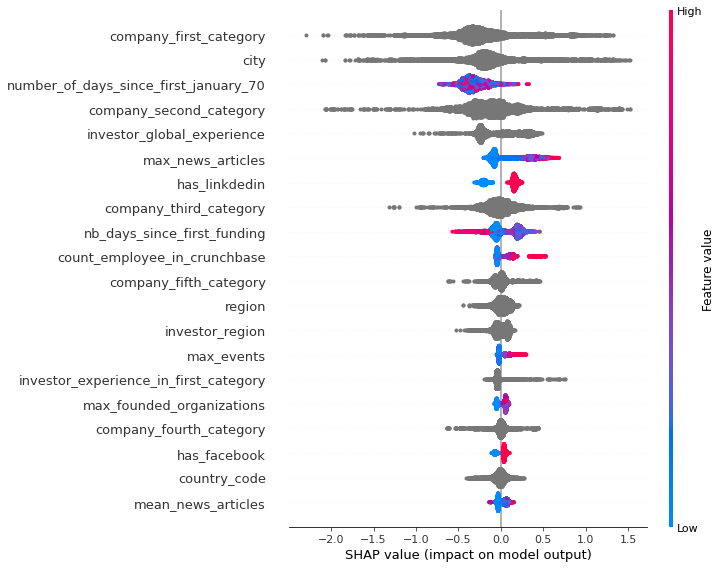

In [39]:
import shap

explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test)

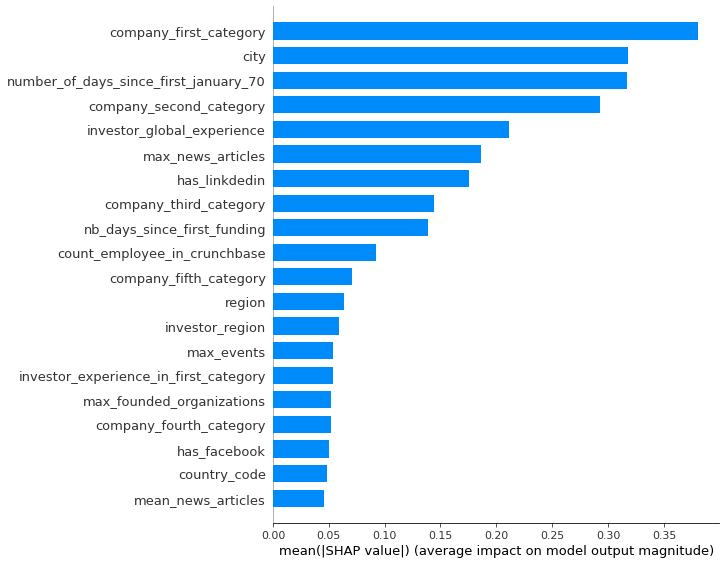

In [40]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

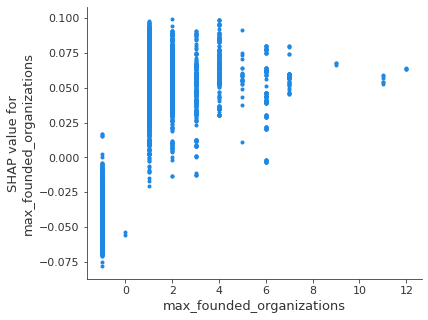

In [41]:
shap.dependence_plot("max_founded_organizations", shap_values, x_test,
                     interaction_index=None)

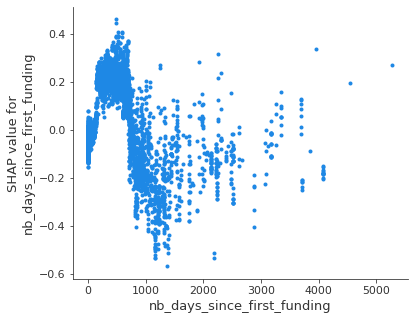

In [42]:
shap.dependence_plot("nb_days_since_first_funding", shap_values, x_test,
                     interaction_index=None)

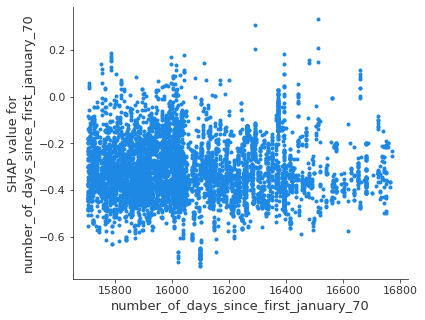

In [43]:
shap.dependence_plot("number_of_days_since_first_january_70", shap_values, x_test,
                     interaction_index=None)

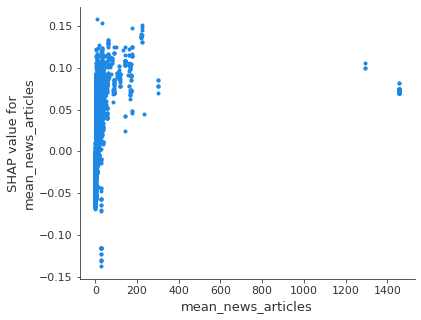

In [44]:
shap.dependence_plot("mean_news_articles", shap_values, x_test,
                     interaction_index=None)

In [45]:
shap.initjs()
sample_index = random.randint(0, len(x_test))

shap.force_plot(explainer.expected_value,
                shap_values[sample_index, :],
                x_test.iloc[sample_index, :])